In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

dat_path=('/home/maria/Downloads/natimg2800_M170717_MP033_2017-08-20.mat')
mat = scipy.io.loadmat(dat_path)
im_path='/home/maria/Downloads/images_natimg2800_all.mat'
im2800=scipy.io.loadmat(im_path)['imgs']

In [2]:
resp=mat['stim']['resp'][0][0]

In [3]:
resp.shape

(6956, 10145)

In [4]:
im=mat['stim']['istim'][0][0]

In [5]:
im.shape

(6956, 1)

In [6]:
print(im2800)

[[[129 132 132 ... 129 127 126]
  [127 133 165 ... 132 116 113]
  [125 133 187 ... 135 102 104]
  ...
  [148 160 129 ... 151 130 127]
  [146 149 127 ... 136 133 129]
  [135 136 125 ... 129 131 132]]

 [[127 133 125 ... 131 127 126]
  [121 135 167 ... 139 119 110]
  [119 136 189 ... 146 107 102]
  ...
  [152 160 137 ... 163 130 118]
  [147 149 132 ... 139 132 125]
  [136 136 126 ... 133 131 133]]

 [[126 133 120 ... 132 128 127]
  [118 137 141 ... 143 119 112]
  [116 138 196 ... 154 108 104]
  ...
  [157 161 139 ... 176 129 116]
  [151 149 134 ... 164 131 130]
  [139 136 127 ... 142 130 134]]

 ...

 [[130 131 112 ... 130 130 132]
  [136 128  94 ... 134 132 135]
  [145 124  81 ... 129 130 142]
  ...
  [116 128 144 ... 122 108  97]
  [131 129 137 ... 113 119 124]
  [130 130 127 ... 123 127 135]]

 [[129 132 111 ... 130 131 129]
  [133 130  91 ... 138 132 132]
  [138 128  77 ... 142 130 139]
  ...
  [111 128 135 ... 109 105 117]
  [125 129 131 ... 116 118 132]
  [126 130 125 ... 124 127 1

(68, 270, 2800)


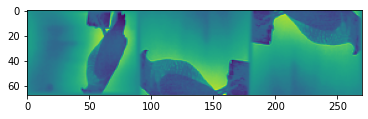

In [7]:
print(im2800.shape)
plt.imshow(im2800[:,:,1])

In [8]:
!pip install imutils

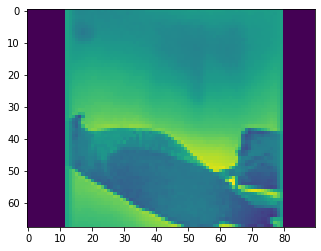

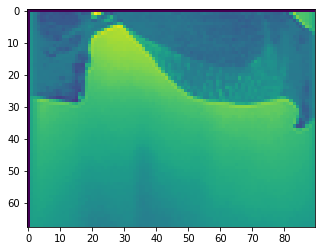

In [11]:
import cv2
import imutils
#Second image
image2 = imutils.rotate(im2800[:,:,1][:,:90], 270)
# Displaying the image
plt.imshow(image2)
plt.show()
image3=imutils.rotate(im2800[:,:,1][:,90:180],180)
plt.imshow(image3)

In [12]:
images=im2800.transpose((2,0,1))
#images=im2800.reshape((2800,270,68))

In [ ]:
#image preprocessing pipeline. 
#resize image and rotate and concatenate into one image. The image should be grayscale.
#Apply model
#Shap values

In [62]:
from sklearn.model_selection import train_test_split


im2800_=im2800.transpose((2,0,1))
im2800_=im2800.reshape((2800,68,270,1))

X=[]
y=[]
for i in range(0,resp.shape[0]):
    if im[i]!=2801:
        X.append(im2800_[im[i][0]-1])
        y.append(resp[i])

y=np.array(y)
X=np.array(X)
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(6621, 68, 270, 1)
(6621, 10145)


In [ ]:
pip install sklearn --upgrade

In [14]:
import autokeras as ak

# Initialize the image regressor.
reg = ak.ImageRegressor(overwrite=True, max_trials=1)
# Feed the image regressor with training data.
reg.fit(X_train, y_train, epochs=2)

Trial 1 Complete [00h 05m 38s]
val_loss: 44.88044357299805

Best val_loss So Far: 44.88044357299805
Total elapsed time: 00h 05m 38s
INFO:tensorflow:Oracle triggered exit
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'poso

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity t

INFO:tensorflow:Assets written to: ./image_regressor/best_model/assets


INFO:tensorflow:Assets written to: ./image_regressor/best_model/assets


In [25]:
import tensorflow as tf
test_set = tf.data.Dataset.from_tensor_slices(((X_test,), (y_test,)))
predicted_y = reg.predict(X_test)
# Evaluate the best model with testing data.
predicted_y

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
69/69 [==============================] - 77s 1s/step


array([[ 9.38171  ],
       [ 6.7487392],
       [10.35506  ],
       ...,
       [ 9.228039 ],
       [ 8.615309 ],
       [ 8.433662 ]], dtype=float32)

[[1.         0.02841513]
 [0.02841513 1.        ]]


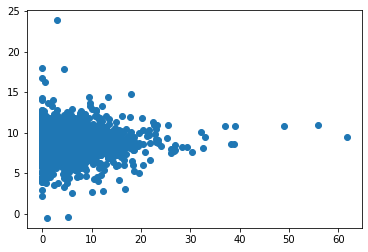

In [28]:
plt.scatter(y_test,predicted_y)
print(np.corrcoef(y_test.flatten(),predicted_y.flatten()))

[[1.         0.00266109]
 [0.00266109 1.        ]]


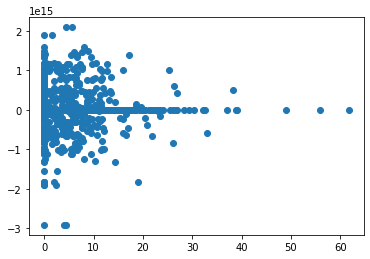

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train.reshape(-1,68*270),y_train)
p=reg.predict(X_test.reshape(-1,68*270))
plt.scatter(y_test,p)
print(np.corrcoef(y_test.flatten(),p.flatten()))

In [17]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
input_shape=(68,270,1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1, activation="softmax"),
    ]
)

In [19]:
batch_size = 128
epochs = 15

model.compile(loss="mse", optimizer="adam", metrics=["mse"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
32/32 [==============================] - ETA: 0s - loss: 59.0806 - mse: 59.0806WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7feb19431200> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
32/32 [==============================] - 57s 2s/step - loss: 59.0806 - mse: 59.0806 - val_loss: 63.8289 - val_mse: 63.8289
Epoch 2/15
 6/32 [====>.........................] - ETA: 48s - loss: 69.6117 - mse: 69.6117

KeyboardInterrupt: 

In [35]:
mat['stat'].shape

(10145, 1)

In [39]:
mat['stat']

array([[(array([[  49],
               [  50],
               [  51],
               [  52],
               [  53],
               [  54],
               [  55],
               [  56],
               [  57],
               [  58],
               [  59],
               [  60],
               [  61],
               [  62],
               [  63],
               [ 549],
               [ 550],
               [ 551],
               [ 552],
               [ 553],
               [ 554],
               [ 555],
               [ 556],
               [ 557],
               [ 558],
               [ 559],
               [ 560],
               [1049],
               [1050],
               [1051],
               [1052],
               [1053],
               [1054],
               [1055],
               [1056],
               [1057],
               [1058],
               [1059],
               [1060],
               [1549],
               [1550],
               [1551],
               [1552],
          

In [48]:
stat = mat['stat']['med'] 

In [55]:
stat[0][0][0]

array([55,  3], dtype=uint8)

In [56]:
ypos = np.array([stat[n][0][0][0] for n in range(len(stat))]) 
# (notice the python list comprehension [X(n) for n in range(N)])
xpos = np.array([stat[n][0][0][1] for n in range(len(stat))]) 

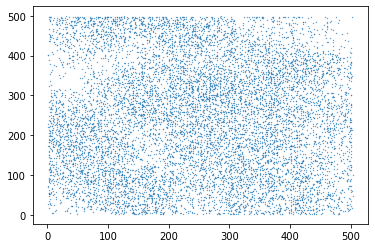

In [61]:
plt.scatter(xpos,ypos,s=0.1)

In [65]:
from sklearn.decomposition import PCA

pca=PCA(n_components=10).fit(y_train)
pcs=pca.transform(y_test)
print(pcs.shape)

(2185, 10)


In [66]:
comps=pca.components_

In [67]:
print(comps.shape)

(10, 10145)


In [90]:
comp= comps[1,:]
comp= comp/np.max(np.abs(comp))
lam = np.abs(comp)

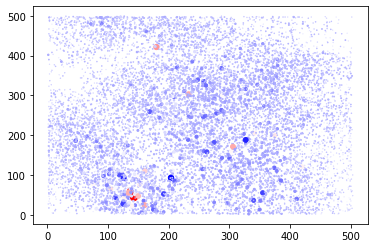

In [91]:
plt.scatter(xpos, ypos, s = 50*lam, c = comps[1,:], cmap='bwr')

In [88]:
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit

ep=EnsemblePursuit(n_components=10,lam=0.01,n_kmeans=10)
model=ep.fit(y_train)
V=model.components_
U=model.weights

obtained 10 PCs in 4.9177 seconds
initialized 10 clusters with k-means in 5.7434 seconds
ensemble 0, time 1.73, nr neurons 1726, EV 0.0071
ensemble 9, time 11.06, nr neurons 713, EV 0.0312
average sparsity is 0.0855


In [87]:
print(U.shape)

(4436, 10)


In [85]:
print(y_train.shape)

(4436, 10145)


In [103]:
print(U)

[[ 9.06443165 11.08951121  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [12.57912528  0.          0.         ...  0.          0.
   0.        ]
 [12.87549652  0.          0.         ...  0.          0.
   0.        ]
 [14.24831774  0.          0.         ...  0.          0.
   0.        ]]


In [93]:
comp_= U[:,0]
comp_= comp/np.max(np.abs(comp_))
lam = np.abs(comp_)

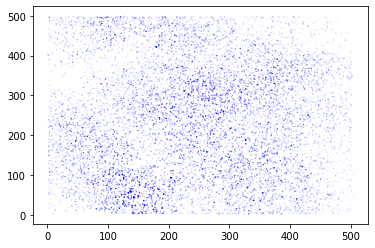

In [102]:
plt.scatter(xpos, ypos, s = 50*lam, c = U[:,7], cmap='bwr')

In [109]:
from sklearn.decomposition import NMF

y_train[y_train<0]=0
nmf=NMF(n_components=10).fit(y_train)
cs=nmf.transform(y_test)

/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/home/maria/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [115]:
cs.shape

(2185, 10)

[0.00157531 0.05136663 0.00507745 ... 0.41540486 0.2917528  0.34054434]


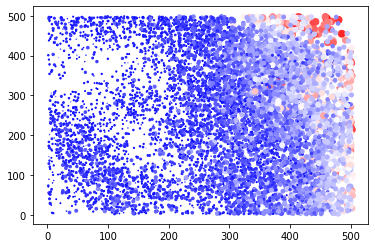

In [137]:
i=1
css=nmf.components_
comp= css[i,:]
comp= comp/np.max(np.abs(comp))
lam = np.abs(comp)
print(lam)
plt.scatter(xpos, ypos, s = 50*lam, c = css[i,:], cmap='bwr')